In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../data/TrainSet.txt", header=0, sep="\t")

In [3]:
df = df[df.Replicate.isna()].drop("Replicate", axis=1)

In [4]:
df.groupby(by="Intensity").size()
df_low = df[df["Intensity"] == "low "]
df_high = df[df["Intensity"] == "high "]

In [5]:
target_col = "INTENSITY/STRENGTH"

df_high_wide = (df_high.loc[:,["subject #", "Compound Identifier", target_col]]
                .pivot(index="subject #", columns="Compound Identifier", values=target_col))
df_low_wide = (df_low.loc[:,["subject #", "Compound Identifier", target_col]]
                .pivot(index="subject #", columns="Compound Identifier", values=target_col))
df_diff_wide = df_low_wide - df_high_wide
print(df_diff_wide.shape)
df_diff_wide.head(n=10)

(49, 338)


Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
subject #,,,,,,,,,,,,,,,,,,,,,
1,-30,0,3,-41,21,-73,79,-5,-11,-15,...,-53,-47,-20,11,-59,0,52,-60,0,5
2,-9,-83,-23,0,0,-30,0,-9,-25,-54,...,-43,0,2,-20,-84,0,0,-72,0,-59
3,89,-69,-83,-40,-64,-51,64,-54,-33,11,...,-66,0,-60,0,-17,-62,-2,0,71,0
4,-71,20,-90,-91,-69,-4,0,-5,-93,-56,...,-12,21,0,0,-65,-13,-69,-10,-1,-100
5,-58,-67,-60,0,0,-84,-18,7,-7,0,...,-68,0,-50,-63,-68,-54,0,-69,0,0
6,0,0,0,0,0,-88,0,0,-17,0,...,-53,0,4,0,0,-57,9,0,0,13
7,-12,0,-17,-21,-22,-85,-2,-28,-11,3,...,-3,14,-10,-2,-94,-90,-79,-31,-66,-5
8,-5,-57,-33,-45,-4,-57,19,-79,-56,0,...,-40,0,17,-82,-50,-66,-54,-50,0,-32
9,-100,-17,-100,0,-31,-100,0,-47,-100,-25,...,-100,0,-61,-62,-30,-43,0,0,0,-54


In [6]:
from sklearn.preprocessing import StandardScaler

import umap

In [7]:
df_low_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_low_wide), columns=df_diff_wide.columns, index=df_low_wide.index)
df_high_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_high_wide), columns=df_diff_wide.columns, index=df_high_wide.index)
df_diff_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_diff_wide), columns=df_diff_wide.columns, index=df_diff_wide.index)


df_low_wide_scaled.describe()
# df_low_wide_scaled.head(n=10)

Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,...,4.900000e+01,49.000000,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,49.000000,4.900000e+01,4.900000e+01,4.900000e+01
mean,4.531523e-18,1.246169e-17,3.851794e-17,-2.379049e-17,4.446557e-17,-2.265761e-17,2.945490e-17,-8.270029e-17,-9.063045e-17,-7.930164e-18,...,6.344132e-17,0.000000,-1.166867e-16,-9.402909e-17,-3.625218e-17,1.586033e-17,0.000000,7.250436e-17,-3.639379e-17,-2.718914e-17
std,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,...,1.010363e+00,1.010363,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363,1.010363e+00,1.010363e+00,1.010363e+00
min,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.410572e+00,-1.319961e+00,-4.120736e-01,...,-9.802436e-01,-0.541838,-1.551294e+00,-1.303788e+00,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
25%,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.023454e+00,-1.257830e+00,-4.120736e-01,...,-9.802436e-01,-0.541838,-6.411557e-01,-1.164604e+00,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
50%,-2.780724e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,1.378970e-01,3.265032e-01,-4.120736e-01,...,-4.306093e-01,-0.541838,6.672972e-02,3.942609e-01,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
75%,7.029670e-01,-4.004062e-01,1.759399e-01,2.329812e-01,6.791866e-01,2.965244e-02,-3.135764e-01,7.713615e-01,8.856796e-01,-3.035166e-01,...,9.129415e-01,0.075605,7.071975e-01,8.118139e-01,-2.322197e-01,-3.764504e-01,-0.223046,3.616321e-01,-3.724343e-01,1.400311e-01
max,2.338033e+00,4.174638e+00,3.604196e+00,4.635259e+00,2.278461e+00,2.935592e+00,4.280682e+00,1.791943e+00,1.444856e+00,4.255878e+00,...,2.073281e+00,3.780266,1.819589e+00,1.479899e+00,3.755665e+00,4.702056e+00,2.697705,3.706996e+00,3.783816e+00,2.595381e+00


In [8]:
reducer_high = umap.UMAP(random_state=42, n_components=10)
reducer_high_plot = umap.UMAP(random_state=42, n_components=2)
embedding_high = reducer_high.fit_transform(df_high_wide_scaled)
embedding_high_plot = reducer_high_plot.fit_transform(df_high_wide_scaled)

reducer_low = umap.UMAP(random_state=42, n_components=10)
reducer_low_plot = umap.UMAP(random_state=42, n_components=2)
embedding_low = reducer_high.fit_transform(df_low_wide_scaled)
embedding_low_plot = reducer_high_plot.fit_transform(df_low_wide_scaled)

reducer_diff = umap.UMAP(random_state=42, n_components=10)
reducer_diff_plot = umap.UMAP(random_state=42, n_components=2)
embedding_diff = reducer_high.fit_transform(df_diff_wide_scaled)
embedding_diff_plot = reducer_high_plot.fit_transform(df_diff_wide_scaled)
embedding_diff_plot.shape

(49, 2)

In [9]:
from sklearn.cluster import DBSCAN, KMeans

clustering_high = KMeans(n_clusters=2).fit(embedding_high)
clustering_low = KMeans(n_clusters=2).fit(embedding_low)
clustering_diff = KMeans(n_clusters=2).fit(embedding_diff)

print(clustering_diff.labels_)

[1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 1 1 0 1 0]


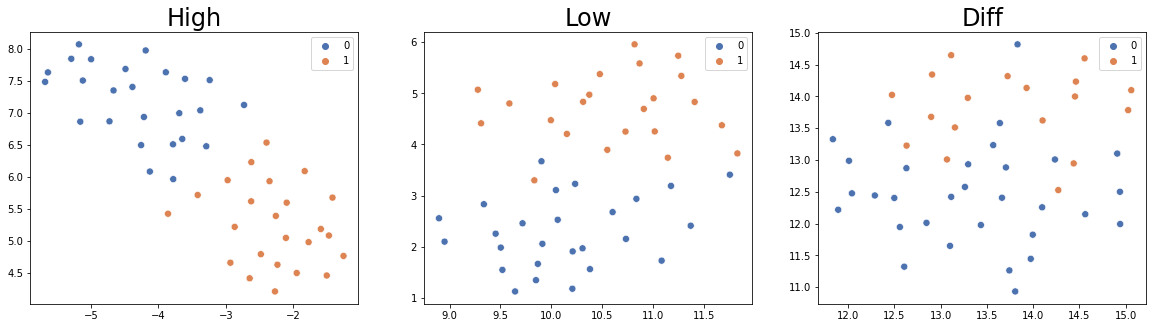

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x=embedding_high_plot[:, 0], y=embedding_high_plot[:, 1], hue=clustering_high.labels_, palette="deep", s=50, ax=ax1)
ax1.set_title("High", fontsize=24)

sns.scatterplot(x=embedding_low_plot[:, 0], y=embedding_low_plot[:, 1], hue=clustering_low.labels_, palette="deep", s=50, ax=ax2)
ax2.set_title("Low", fontsize=24)

sns.scatterplot(x=embedding_diff_plot[:, 0], y=embedding_diff_plot[:, 1], hue=clustering_diff.labels_, palette="deep", s=50, ax=ax3)
ax3.set_title("Diff", fontsize=24)

plt.show()

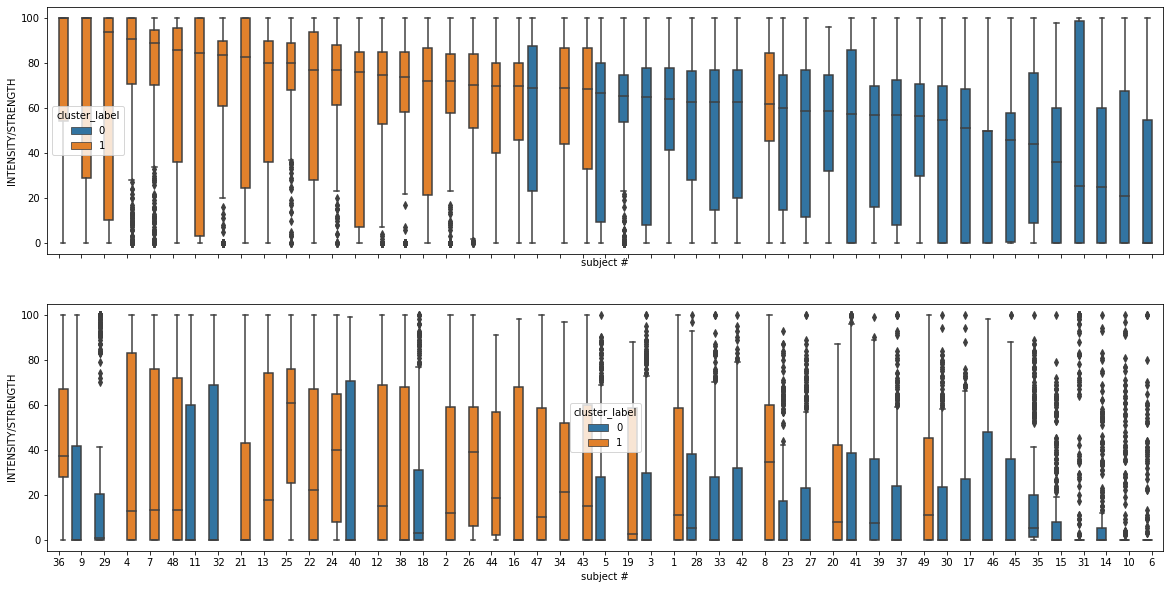

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=False)

target_col = "INTENSITY/STRENGTH"
# target_col = "VALENCE/PLEASANTNESS"
subject_order = df_high.groupby("subject #").median().sort_values(by=target_col, ascending=False).index
subject_cluster_mapping_high = pd.DataFrame(clustering_high.labels_, index=df_high_wide.index, columns = ["cluster_label"])
subject_cluster_mapping_low = pd.DataFrame(clustering_low.labels_, index=df_low_wide.index, columns = ["cluster_label"])


sns.boxplot(
    data = pd.merge(df_high, subject_cluster_mapping_high, on='subject #',how='left'), 
    order=subject_order,
    x = "subject #", 
    y = target_col,
    ax=ax1,
    hue="cluster_label"
)

sns.boxplot(
    data = pd.merge(df_low, subject_cluster_mapping_low, on='subject #',how='left'), 
    order = subject_order,
    x = "subject #", 
    y = target_col,
    ax = ax2,
    hue="cluster_label"
)

plt.show()